In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code'

/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code


In [3]:
!pip install scanpy
!pip install stlearn 
!pip install matplotlib==3.4.3
!pip install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 2.1 MB/s 
     |████████████████████████████████| 88 kB 9.2 MB/s 
     |████████████████████████████████| 11.2 MB 60.6 MB/s 
     |████████████████████████████████| 96 kB 6.2 MB/s 
     |████████████████████████████████| 959 kB 48.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.0 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=05bf047b2e24be03a25625618d0f8fef2094034868082bc89bb5c62bb5ba8889
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a3a66cd775504eb0bf595e4782bfee715e441138122203160359fed9bfd94186
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 429 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 57.1 MB/s 
     |████████████████████████████████| 3.1 MB 56.7 MB/s 
     |████████████████████████████████| 96 kB 6.5 MB/s 
     |████████████████████████████████| 13.5 MB 60.2 MB/s 
     |████████████████████████████████| 18.5 MB 449 kB/s 
     |████████████████████████████████| 1.3 MB 17.5 MB/s 
     |████████████████████████████████| 3.1 MB 26.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 1.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 2.1 MB/s 
     |████████████████████████████████| 1.2 MB 59.4 MB/s 
     |████████████████████████████████| 1.4 MB 56.3 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367718 sha256=f721ce9ee44fba41525abf64d1087e9449f838e2a302d70fb3d17b1dc6c0732c
  Stored in directory: /root/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [3]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
import sys 

import os
from copy import deepcopy
import numpy as np
import pandas as pd
import stlearn as st

import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

module_path = os.path.abspath(os.path.join('../../FPST','code'))
if module_path not in sys.path:
    sys.path.append(module_path)

from load_data import Data, load_visium_data
from train import engine
from image_data import *
from models import NMF
from plot import plot_train_vs_test, plot_genes_read_count, plot_true_vs_reconstructed_histogram
from losses import RMSELossWithoutZeros

# choose the device 
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


## Dataset Name

In [4]:
dataset_name = '../data/Visium_Mouse_Olfactory_Bulb'

## NMF- random spots

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:57<00:00, 240.29it/s]


Epoch #0 Train Loss: 1.1519293854175845
Epoch #0 Test Loss: 1.1453704209743283


Train epoch 1/300: 100%|██████████| 71449/71449 [05:05<00:00, 233.75it/s]


Epoch #1 Train Loss: 1.061798760674616
Epoch #1 Test Loss: 0.9132781650286461


Train epoch 2/300: 100%|██████████| 71449/71449 [05:26<00:00, 219.11it/s]


Epoch #2 Train Loss: 0.9297043314728135
Epoch #2 Test Loss: 0.817205232110855


Train epoch 3/300: 100%|██████████| 71449/71449 [05:20<00:00, 222.86it/s]


Epoch #3 Train Loss: 0.8553188714534418
Epoch #3 Test Loss: 0.7643433763836255


Train epoch 4/300: 100%|██████████| 71449/71449 [05:30<00:00, 216.16it/s]


Epoch #4 Train Loss: 0.8068987014120419
Epoch #4 Test Loss: 0.7300274503098287


Train epoch 5/300: 100%|██████████| 71449/71449 [05:33<00:00, 213.95it/s]


Epoch #5 Train Loss: 0.7720474601891841
Epoch #5 Test Loss: 0.705192820862435


Train epoch 6/300: 100%|██████████| 71449/71449 [05:37<00:00, 211.85it/s]


Epoch #6 Train Loss: 0.7454335476553178
Epoch #6 Test Loss: 0.6863919616227598


Train epoch 7/300: 100%|██████████| 71449/71449 [05:45<00:00, 207.02it/s]


Epoch #7 Train Loss: 0.7244709496108088
Epoch #7 Test Loss: 0.6716668575977093


Train epoch 8/300: 100%|██████████| 71449/71449 [06:05<00:00, 195.22it/s]


Epoch #8 Train Loss: 0.707494329408592
Epoch #8 Test Loss: 0.6597772441693364


Train epoch 9/300: 100%|██████████| 71449/71449 [06:23<00:00, 186.30it/s]


Epoch #9 Train Loss: 0.6934415262005184
Epoch #9 Test Loss: 0.6499890125536664


Train epoch 10/300: 100%|██████████| 71449/71449 [06:33<00:00, 181.44it/s]


Epoch #10 Train Loss: 0.6816107046404447
Epoch #10 Test Loss: 0.641789416875736
Early stopping


### Plot train and test vs epochs

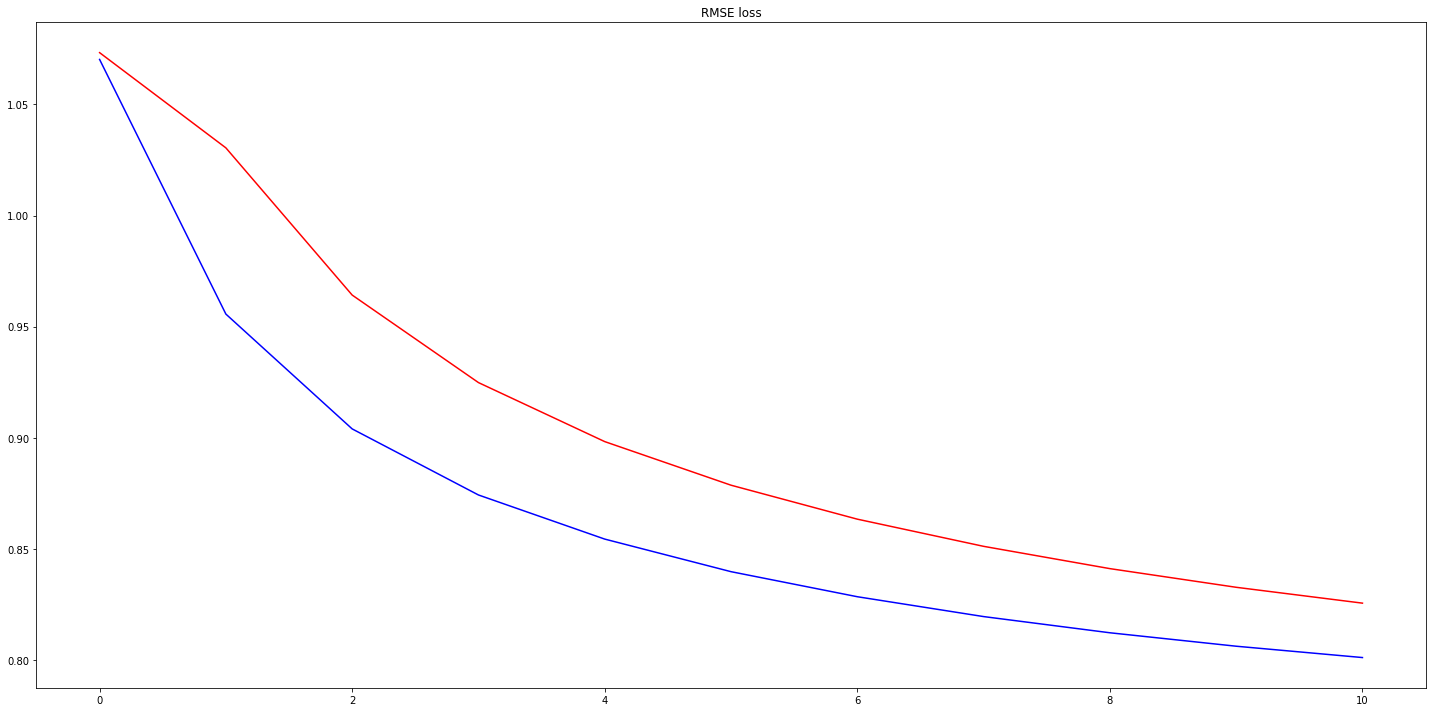

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.39826024 0.41123685 0.344614   ... 0.86453861 1.58116269 0.31923509]
 [0.91012794 0.70038307 0.9

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

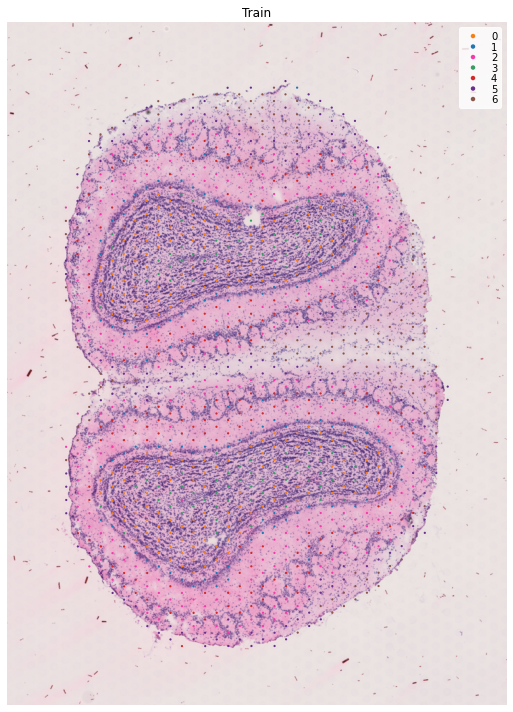

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- data per spot

In [ ]:
dataset, data = load_visium_data(dataset_name, 'spots_data', min_cells=177, min_counts=10)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(number_of_genes, number_of_spots, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 90421/90421 [06:34<00:00, 229.08it/s]


Epoch #0 Train Loss: 1.016254504821904
Epoch #0 Test Loss: 1.106961207580438


Train epoch 1/300: 100%|██████████| 90421/90421 [07:08<00:00, 211.01it/s]


Epoch #1 Train Loss: 0.856635200503463
Epoch #1 Test Loss: 1.1064111090071675


Train epoch 2/300: 100%|██████████| 90421/90421 [07:31<00:00, 200.12it/s]


Epoch #2 Train Loss: 0.7723656077707914
Epoch #2 Test Loss: 1.1060826411198688
Early stopping


### Plot train and test vs epochs

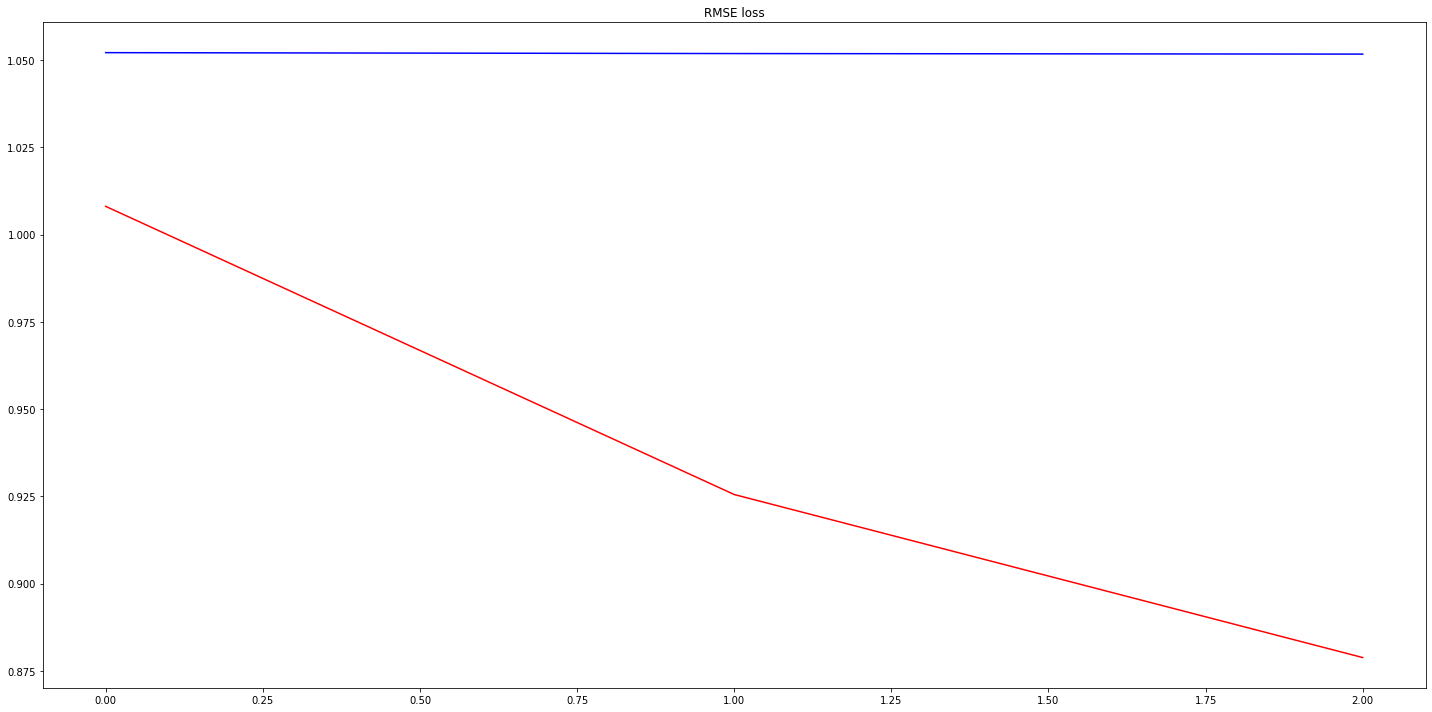

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.41693538 0.55678904 0.36254621 ... 0.83421063 1.64756417 0.45099825]
 [0.98906696 0.89523447 0.9

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


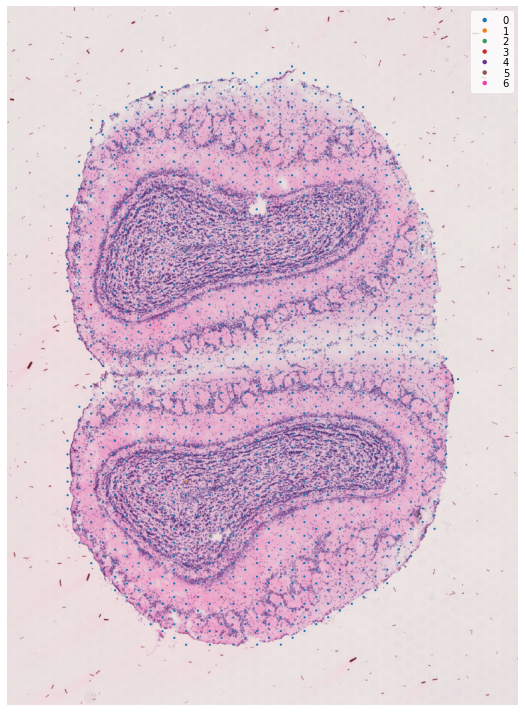

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing (full mean between spot and neighbors)

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean')

/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'expr_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression_with_neighbors['expression_mean'] = spot_expression_with_neighbors[expression_column_names].mean(axis=1

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [06:56<00:00, 171.37it/s]


Epoch #0 Train Loss: 0.9160607338215839
Epoch #0 Test Loss: 0.9162955476387838


Train epoch 1/300: 100%|██████████| 71449/71449 [07:05<00:00, 168.08it/s]


Epoch #1 Train Loss: 0.906383974837664
Epoch #1 Test Loss: 0.8758871256287438


Train epoch 2/300: 100%|██████████| 71449/71449 [07:07<00:00, 167.23it/s]


Epoch #2 Train Loss: 0.8119184256021543
Epoch #2 Test Loss: 0.7644694460911662


Train epoch 3/300: 100%|██████████| 71449/71449 [07:20<00:00, 162.32it/s]


Epoch #3 Train Loss: 0.7406079021652426
Epoch #3 Test Loss: 0.7015547874985292


Train epoch 4/300: 100%|██████████| 71449/71449 [07:30<00:00, 158.55it/s]


Epoch #4 Train Loss: 0.6934501062627789
Epoch #4 Test Loss: 0.6594895715404883


Train epoch 5/300: 100%|██████████| 71449/71449 [07:41<00:00, 154.98it/s]


Epoch #5 Train Loss: 0.658395471232876
Epoch #5 Test Loss: 0.6279043519281631


Train epoch 6/300: 100%|██████████| 71449/71449 [07:39<00:00, 155.57it/s]


Epoch #6 Train Loss: 0.6310652589562796
Epoch #6 Test Loss: 0.6038173772863857


Train epoch 7/300: 100%|██████████| 71449/71449 [07:49<00:00, 152.19it/s]


Epoch #7 Train Loss: 0.6094964119256397
Epoch #7 Test Loss: 0.5849022218607254


Train epoch 8/300: 100%|██████████| 71449/71449 [07:58<00:00, 149.21it/s]


Epoch #8 Train Loss: 0.5919770222812865
Epoch #8 Test Loss: 0.5695358225809608


Train epoch 9/300: 100%|██████████| 71449/71449 [08:04<00:00, 147.41it/s]


Epoch #9 Train Loss: 0.5773779686197468
Epoch #9 Test Loss: 0.556748361954025


Train epoch 10/300: 100%|██████████| 71449/71449 [08:08<00:00, 146.25it/s]


Epoch #10 Train Loss: 0.565013259912769
Epoch #10 Test Loss: 0.5459639042343789


Train epoch 11/300: 100%|██████████| 71449/71449 [08:16<00:00, 143.81it/s]


Epoch #11 Train Loss: 0.5544247990696948
Epoch #11 Test Loss: 0.5367540560712798


Train epoch 12/300: 100%|██████████| 71449/71449 [08:21<00:00, 142.59it/s]


Epoch #12 Train Loss: 0.5452547436293248
Epoch #12 Test Loss: 0.5287952944942295
Early stopping


### Plot train and test vs epochs

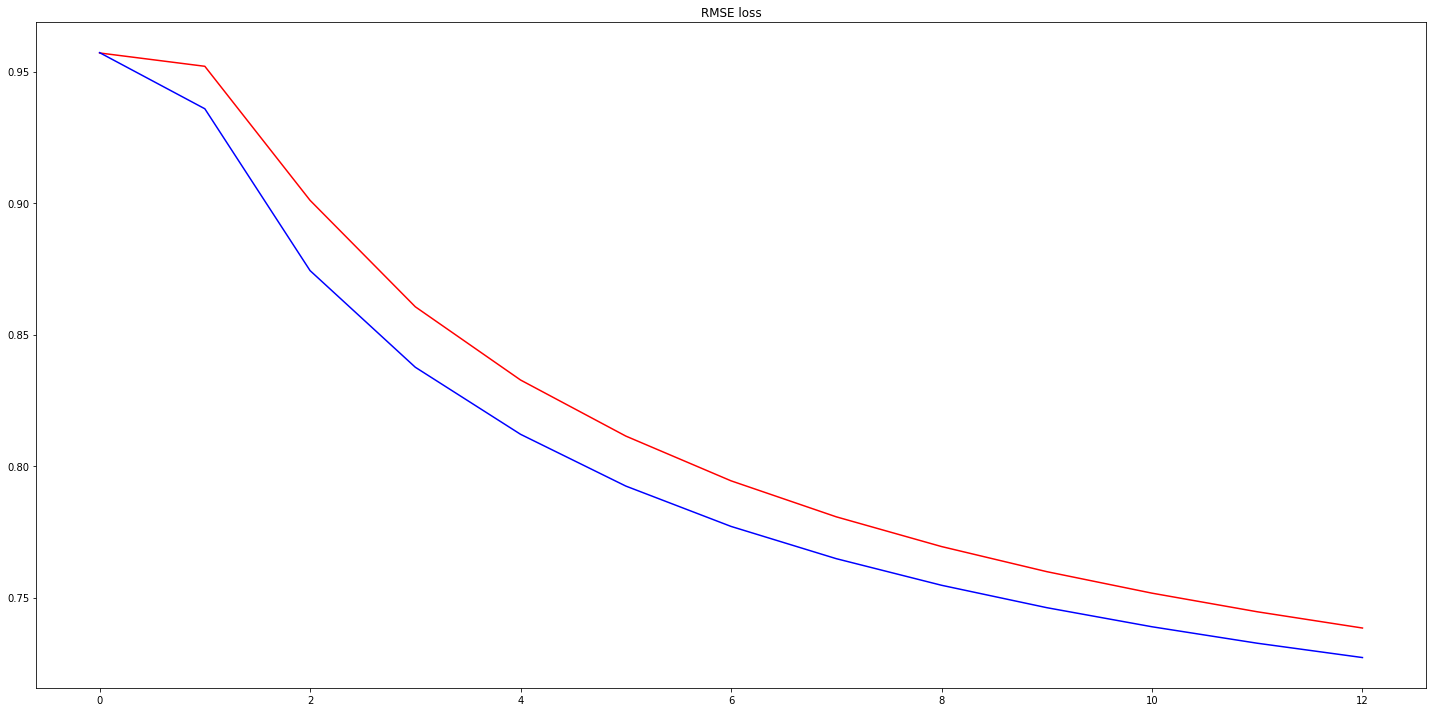

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.1102446  0.103677   0.03192035 ... 0.47374141 1.13628674 0.03644004]
 [0.49730942 0.29783455 0.3

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


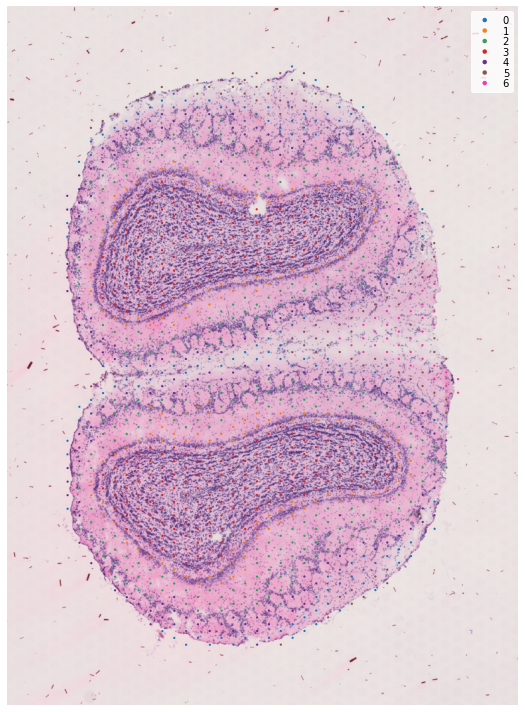

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing (weighted mean between spot (0.5) and neighbors (0.5))

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_distance')

/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'expr_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression_with_neighbors['neighbors_mean'] = spot_expression_with_neighbors[neighbors_names].mean(axis=1)
/cont

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:52<00:00, 244.43it/s]


Epoch #0 Train Loss: 0.9274032470843155
Epoch #0 Test Loss: 0.926902410626804


Train epoch 1/300: 100%|██████████| 71449/71449 [05:06<00:00, 233.07it/s]


Epoch #1 Train Loss: 0.9116743162577521
Epoch #1 Test Loss: 0.862747447925587


Train epoch 2/300: 100%|██████████| 71449/71449 [05:13<00:00, 227.59it/s]


Epoch #2 Train Loss: 0.8155743498796744
Epoch #2 Test Loss: 0.7661735811384238


Train epoch 3/300: 100%|██████████| 71449/71449 [05:19<00:00, 223.78it/s]


Epoch #3 Train Loss: 0.752691533533437
Epoch #3 Test Loss: 0.7126634785424921


Train epoch 4/300: 100%|██████████| 71449/71449 [05:30<00:00, 215.91it/s]


Epoch #4 Train Loss: 0.7118947012680555
Epoch #4 Test Loss: 0.6779429947106189


Train epoch 5/300: 100%|██████████| 71449/71449 [05:47<00:00, 205.74it/s]


Epoch #5 Train Loss: 0.6825135996134537
Epoch #5 Test Loss: 0.6525400171978311


Train epoch 6/300: 100%|██████████| 71449/71449 [05:53<00:00, 202.26it/s]


Epoch #6 Train Loss: 0.6595973617379044
Epoch #6 Test Loss: 0.6327640756170817


Train epoch 7/300: 100%|██████████| 71449/71449 [06:05<00:00, 195.41it/s]


Epoch #7 Train Loss: 0.6413367998749495
Epoch #7 Test Loss: 0.6172438008680532


Train epoch 8/300: 100%|██████████| 71449/71449 [06:14<00:00, 191.03it/s]


Epoch #8 Train Loss: 0.6266010158492566
Epoch #8 Test Loss: 0.6047653745129762


Train epoch 9/300: 100%|██████████| 71449/71449 [06:12<00:00, 192.04it/s]


Epoch #9 Train Loss: 0.6144242011609578
Epoch #9 Test Loss: 0.5944554747922977


Train epoch 10/300: 100%|██████████| 71449/71449 [06:30<00:00, 182.96it/s]


Epoch #10 Train Loss: 0.6041424334538386
Epoch #10 Test Loss: 0.585755189326001


Train epoch 11/300: 100%|██████████| 71449/71449 [06:36<00:00, 180.38it/s]


Epoch #11 Train Loss: 0.5953260664733601
Epoch #11 Test Loss: 0.5783172620084408
Early stopping


### Plot train and test vs epochs

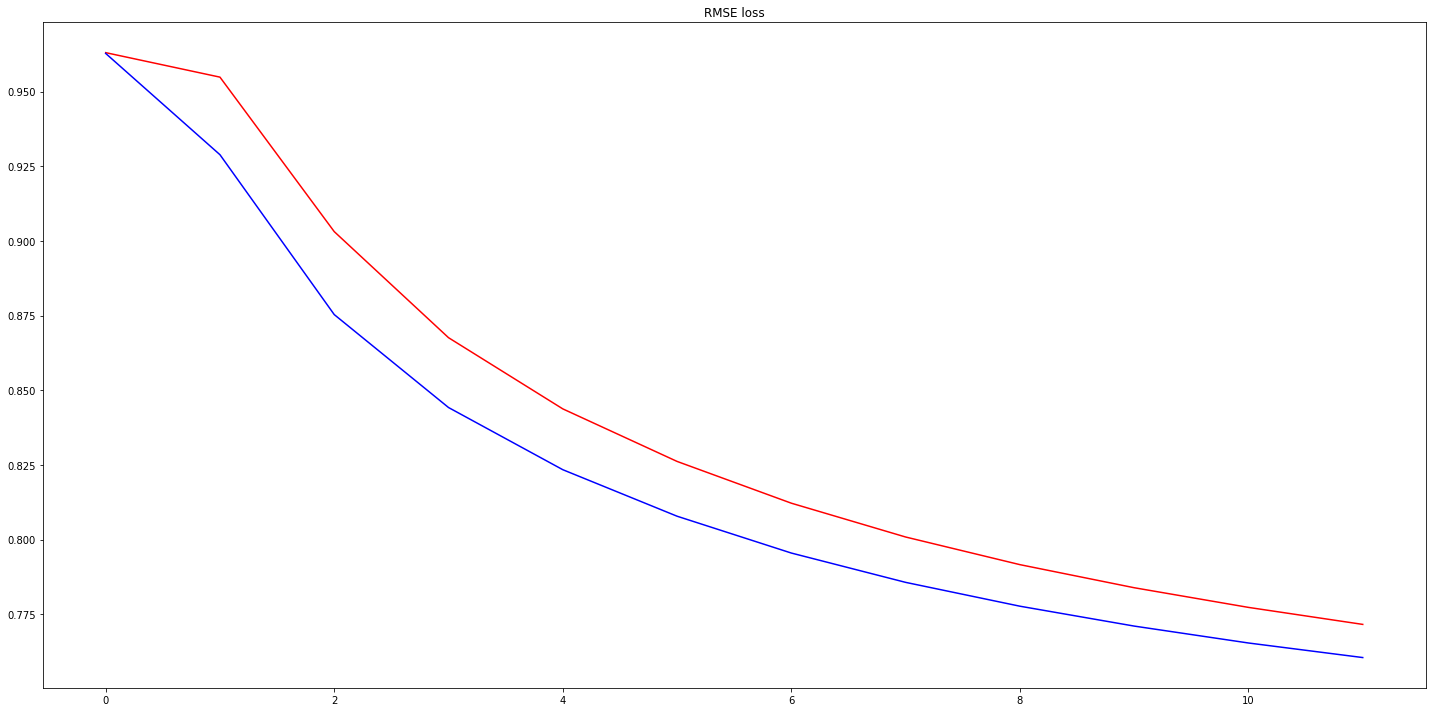

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[6.32384419e-02 2.91867778e-02 2.22154893e-03 ... 4.33755845e-01
  1.06910717e+00 2.52712816e-02]
 

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


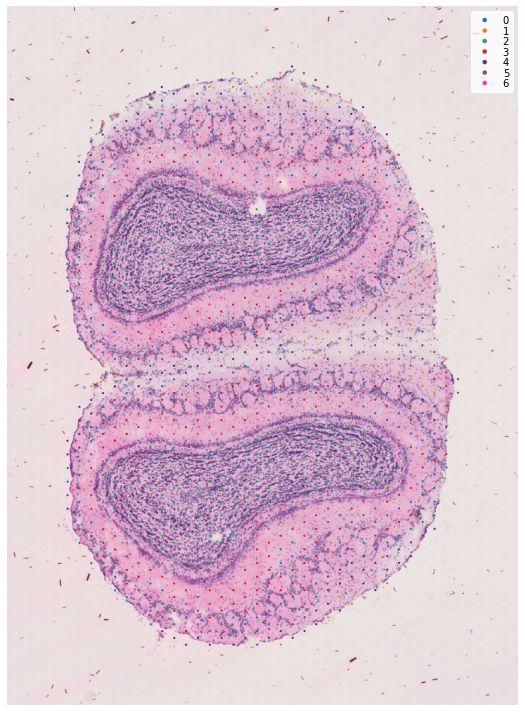

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away 

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_distance_x2')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'expr_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

[autoreload of train failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/train.py", line 23, in <module>
    from models import NMF, EdgeDetectNN, NeighborsDetectNN
ImportError: cannot import name 'NeighborsDetectNN' from 'models' (/

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [05:22<00:00, 221.80it/s]


Epoch #0 Train Loss: 0.8894546941075386
Epoch #0 Test Loss: 0.8883741133878253


Train epoch 1/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.86it/s]


Epoch #1 Train Loss: 0.8804673965641798
Epoch #1 Test Loss: 0.8515391424334378


Train epoch 2/300: 100%|██████████| 71449/71449 [05:31<00:00, 215.81it/s]


Epoch #2 Train Loss: 0.7840874815903471
Epoch #2 Test Loss: 0.7329219852289937


Train epoch 3/300: 100%|██████████| 71449/71449 [05:48<00:00, 204.82it/s]


Epoch #3 Train Loss: 0.7076034378443392
Epoch #3 Test Loss: 0.6648963863310223


Train epoch 4/300: 100%|██████████| 71449/71449 [06:00<00:00, 198.12it/s]


Epoch #4 Train Loss: 0.6561848459319675
Epoch #4 Test Loss: 0.6181301722891235


Train epoch 5/300: 100%|██████████| 71449/71449 [06:06<00:00, 195.21it/s]


Epoch #5 Train Loss: 0.616840233405972
Epoch #5 Test Loss: 0.5822380449070603


Train epoch 6/300: 100%|██████████| 71449/71449 [06:14<00:00, 190.72it/s]


Epoch #6 Train Loss: 0.586052910973364
Epoch #6 Test Loss: 0.5548175594324224


Train epoch 7/300: 100%|██████████| 71449/71449 [06:20<00:00, 187.97it/s]


Epoch #7 Train Loss: 0.5616048580824977
Epoch #7 Test Loss: 0.5330418539110049


Train epoch 8/300: 100%|██████████| 71449/71449 [06:21<00:00, 187.18it/s]


Epoch #8 Train Loss: 0.5415448659759372
Epoch #8 Test Loss: 0.5151696488722406


Train epoch 9/300: 100%|██████████| 71449/71449 [06:38<00:00, 179.26it/s]


Epoch #9 Train Loss: 0.5247177268396414
Epoch #9 Test Loss: 0.5002327218191516


Train epoch 10/300: 100%|██████████| 71449/71449 [06:39<00:00, 178.86it/s]


Epoch #10 Train Loss: 0.5104258345883361
Epoch #10 Test Loss: 0.48759547173568907


Train epoch 11/300: 100%|██████████| 71449/71449 [06:45<00:00, 176.19it/s]


Epoch #11 Train Loss: 0.4981451035858318
Epoch #11 Test Loss: 0.4767561325372966


Train epoch 12/300: 100%|██████████| 71449/71449 [06:50<00:00, 173.88it/s]


Epoch #12 Train Loss: 0.4874654694280578
Epoch #12 Test Loss: 0.46734075622882987


Train epoch 13/300: 100%|██████████| 71449/71449 [07:08<00:00, 166.86it/s]


Epoch #13 Train Loss: 0.478075856490979
Epoch #13 Test Loss: 0.4590723439610831
Early stopping


### Plot train and test vs epochs

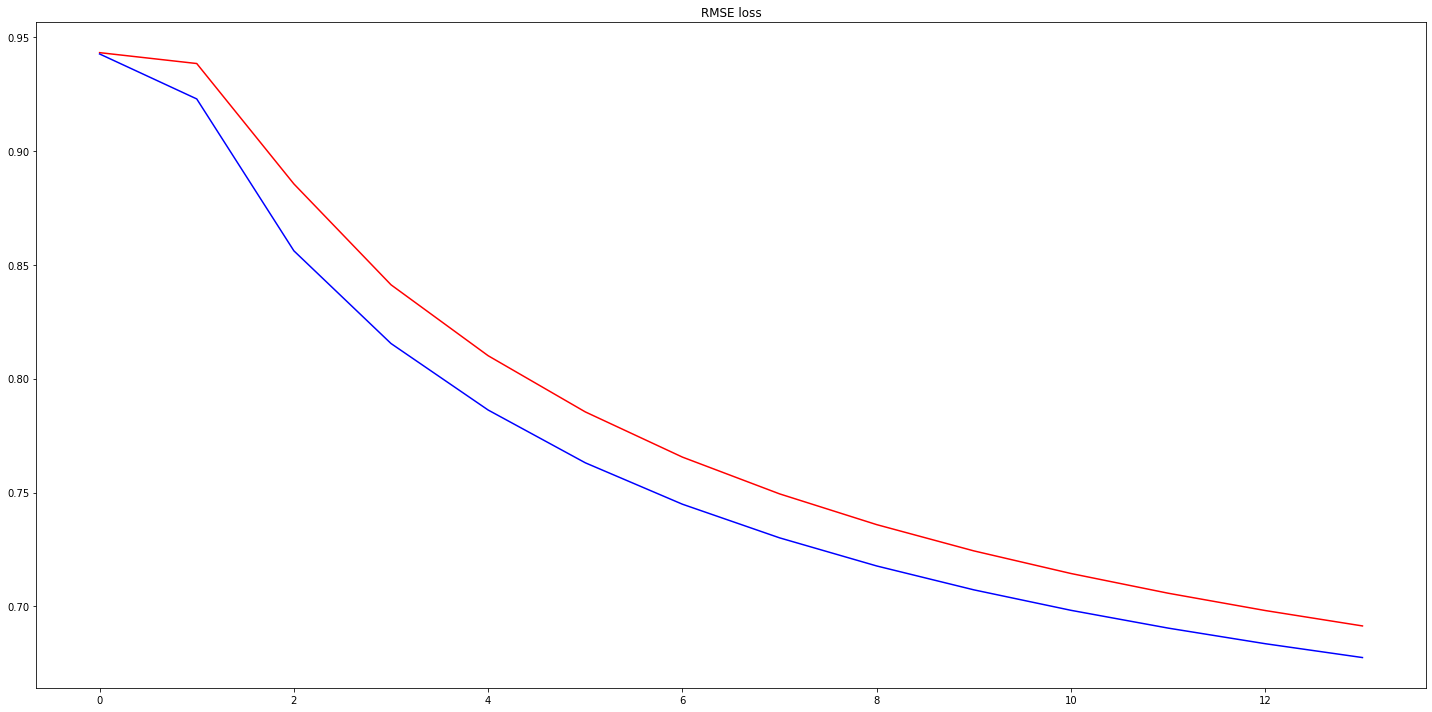

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.05969568 0.04575887 0.04252177 ... 0.55392933 1.32745707 0.01326495]
 [0.43044117 0.27619222 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


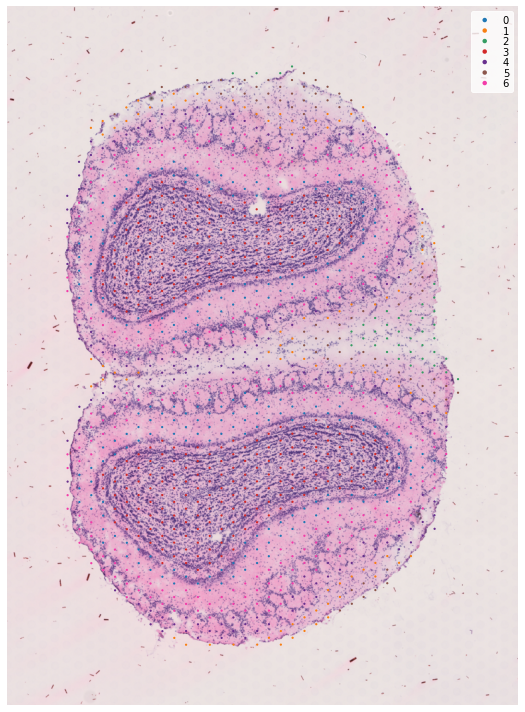

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only same side of edge

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_edge')

/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [06:38<00:00, 179.12it/s]


Epoch #0 Train Loss: 0.9457478009073298
Epoch #0 Test Loss: 0.9427055118176333


Train epoch 1/300: 100%|██████████| 71449/71449 [06:48<00:00, 174.79it/s]


Epoch #1 Train Loss: 0.9240920137576405
Epoch #1 Test Loss: 0.8501590027818656


Train epoch 2/300: 100%|██████████| 71449/71449 [06:56<00:00, 171.42it/s]


Epoch #2 Train Loss: 0.8161586325342474
Epoch #2 Test Loss: 0.752534665686346


Train epoch 3/300: 100%|██████████| 71449/71449 [07:05<00:00, 168.03it/s]


Epoch #3 Train Loss: 0.7500824983916164
Epoch #3 Test Loss: 0.6981682828737271


Train epoch 4/300: 100%|██████████| 71449/71449 [07:09<00:00, 166.53it/s]


Epoch #4 Train Loss: 0.7068634567931602
Epoch #4 Test Loss: 0.6624733376728841


Train epoch 5/300: 100%|██████████| 71449/71449 [07:24<00:00, 160.89it/s]


Epoch #5 Train Loss: 0.6753442526718265
Epoch #5 Test Loss: 0.6361155830513949


Train epoch 6/300: 100%|██████████| 71449/71449 [07:30<00:00, 158.62it/s]


Epoch #6 Train Loss: 0.6509217734550429
Epoch #6 Test Loss: 0.6159957224380807


Train epoch 7/300: 100%|██████████| 71449/71449 [07:37<00:00, 156.23it/s]


Epoch #7 Train Loss: 0.6316645985280812
Epoch #7 Test Loss: 0.6002628351120958


Train epoch 8/300: 100%|██████████| 71449/71449 [07:32<00:00, 157.93it/s]


Epoch #8 Train Loss: 0.6160857399690441
Epoch #8 Test Loss: 0.5875393587151508


Train epoch 9/300: 100%|██████████| 71449/71449 [07:35<00:00, 156.87it/s]


Epoch #9 Train Loss: 0.6031164101657315
Epoch #9 Test Loss: 0.5769214341306921


Train epoch 10/300: 100%|██████████| 71449/71449 [07:41<00:00, 154.96it/s]


Epoch #10 Train Loss: 0.5920609883150129
Epoch #10 Test Loss: 0.5678561686434593


Train epoch 11/300: 100%|██████████| 71449/71449 [07:49<00:00, 152.21it/s]


Epoch #11 Train Loss: 0.5824886481810486
Epoch #11 Test Loss: 0.5600208565207159
Early stopping


### Plot train and test vs epochs

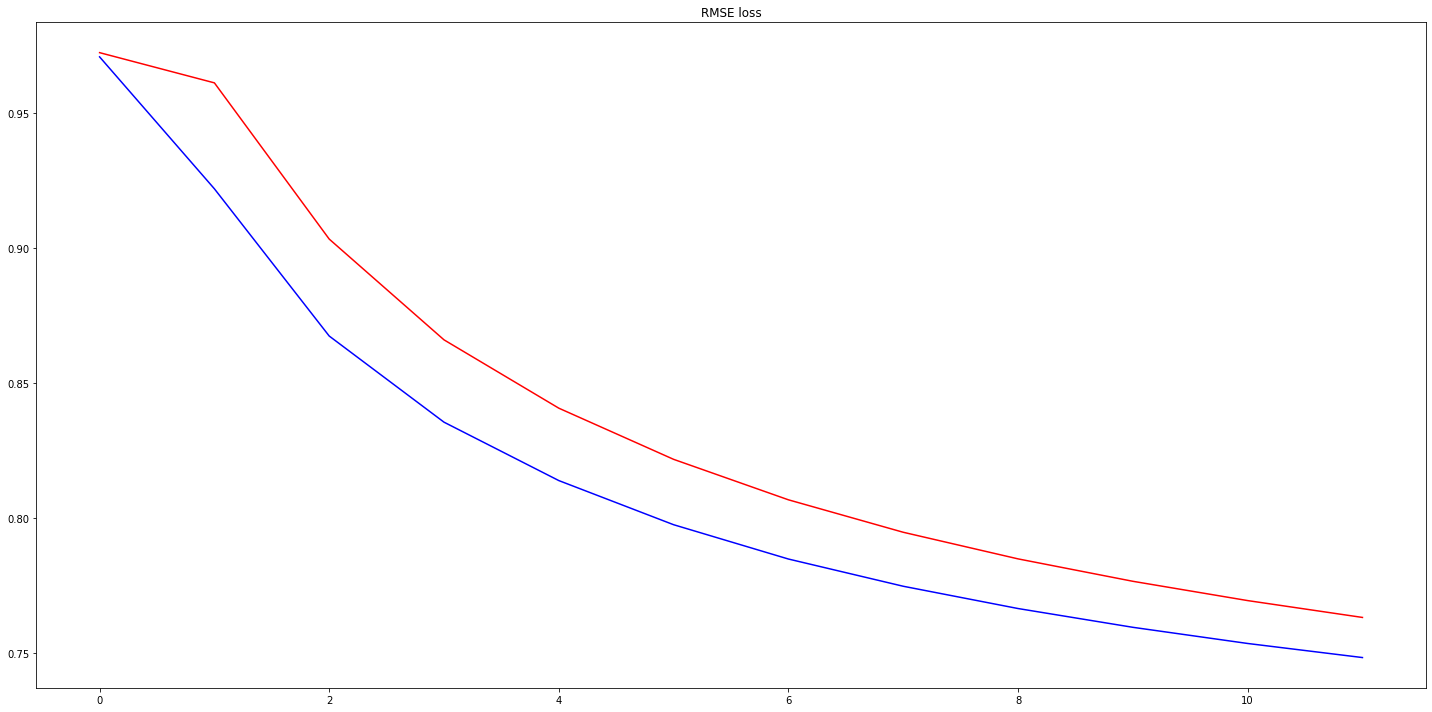

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.14189494 0.10944458 0.0839462  ... 0.53743118 1.13366914 0.06786057]
 [0.37890261 0.29457065 0.3

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


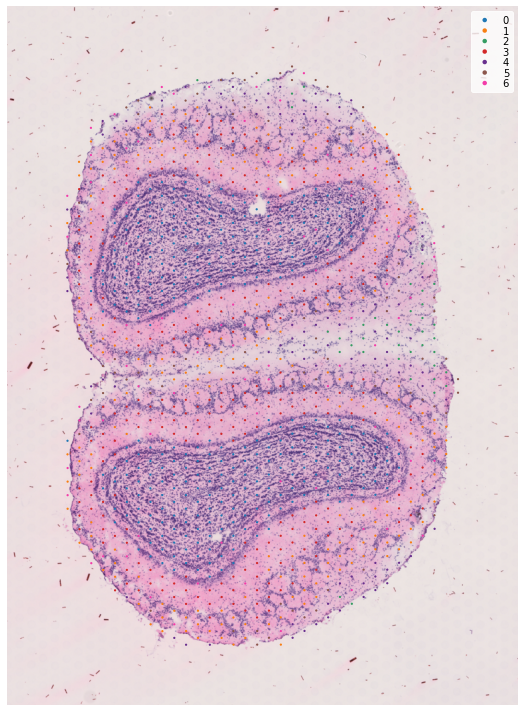

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only pixels mean differs up to 10 + tile of size 10

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:44<00:00, 251.58it/s]


Epoch #0 Train Loss: 0.9221054026060819
Epoch #0 Test Loss: 0.9204557649355933


Train epoch 1/300: 100%|██████████| 71449/71449 [04:56<00:00, 240.72it/s]


Epoch #1 Train Loss: 0.9061914386901704
Epoch #1 Test Loss: 0.8537814606338257


Train epoch 2/300: 100%|██████████| 71449/71449 [05:03<00:00, 235.26it/s]


Epoch #2 Train Loss: 0.8024667660789737
Epoch #2 Test Loss: 0.7489276756667548


Train epoch 3/300: 100%|██████████| 71449/71449 [05:08<00:00, 231.35it/s]


Epoch #3 Train Loss: 0.7340722553513253
Epoch #3 Test Loss: 0.6899951001051932


Train epoch 4/300: 100%|██████████| 71449/71449 [05:10<00:00, 229.99it/s]


Epoch #4 Train Loss: 0.6889612255917068
Epoch #4 Test Loss: 0.6506644124393233


Train epoch 5/300: 100%|██████████| 71449/71449 [05:18<00:00, 224.07it/s]


Epoch #5 Train Loss: 0.655298414042611
Epoch #5 Test Loss: 0.62085016541988


Train epoch 6/300: 100%|██████████| 71449/71449 [05:24<00:00, 220.49it/s]


Epoch #6 Train Loss: 0.6288593149302016
Epoch #6 Test Loss: 0.5980398930171343


Train epoch 7/300: 100%|██████████| 71449/71449 [05:30<00:00, 216.22it/s]


Epoch #7 Train Loss: 0.6079480324283567
Epoch #7 Test Loss: 0.5800854603604232


Train epoch 8/300: 100%|██████████| 71449/71449 [05:40<00:00, 209.58it/s]


Epoch #8 Train Loss: 0.590908061344574
Epoch #8 Test Loss: 0.5654352331690807


Train epoch 9/300: 100%|██████████| 71449/71449 [05:45<00:00, 206.74it/s]


Epoch #9 Train Loss: 0.5766495010296979
Epoch #9 Test Loss: 0.5531986000306685


Train epoch 10/300: 100%|██████████| 71449/71449 [05:51<00:00, 203.18it/s]


Epoch #10 Train Loss: 0.5645189582399637
Epoch #10 Test Loss: 0.5428161974657408


Train epoch 11/300: 100%|██████████| 71449/71449 [06:01<00:00, 197.80it/s]


Epoch #11 Train Loss: 0.5540687693155221
Epoch #11 Test Loss: 0.533891520521477


Train epoch 12/300: 100%|██████████| 71449/71449 [06:05<00:00, 195.25it/s]


Epoch #12 Train Loss: 0.5449664883378202
Epoch #12 Test Loss: 0.5261303879464405
Early stopping


### Plot train and test vs epochs

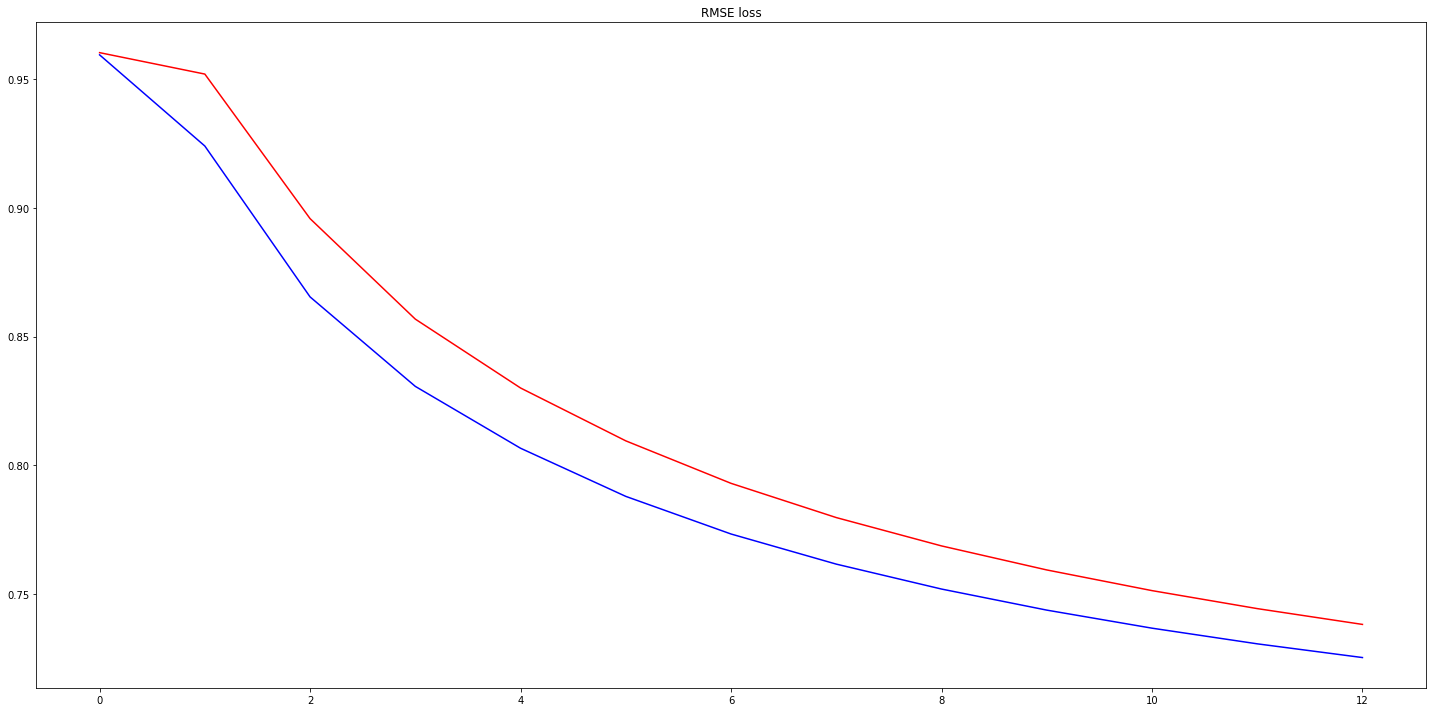

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.08133356 0.10973    0.09058695 ... 0.5754512  1.18981528 0.01764867]
 [0.31096393 0.25089467 0.3

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

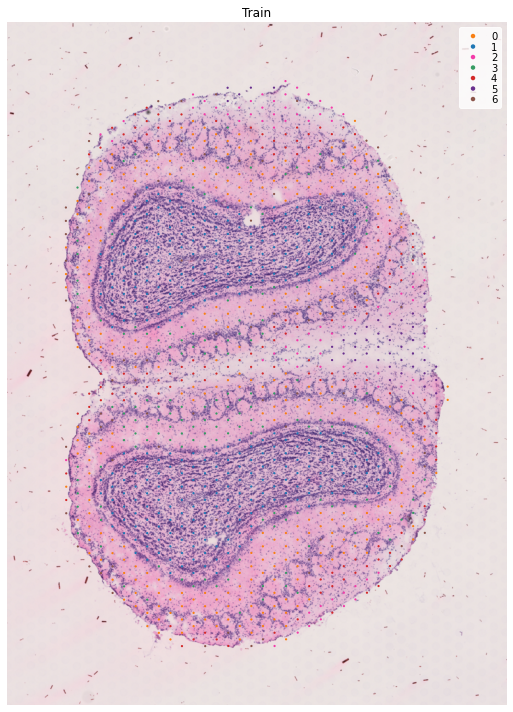

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only pixels mean differs up to 25 + tile of size 10

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:46<00:00, 249.37it/s]


Epoch #0 Train Loss: 0.8952676430020114
Epoch #0 Test Loss: 0.8941147975098934


Train epoch 1/300: 100%|██████████| 71449/71449 [04:54<00:00, 242.61it/s]


Epoch #1 Train Loss: 0.8847228682674319
Epoch #1 Test Loss: 0.8507017064426591


Train epoch 2/300: 100%|██████████| 71449/71449 [05:00<00:00, 237.70it/s]


Epoch #2 Train Loss: 0.7861312959605794
Epoch #2 Test Loss: 0.7358755877760211


Train epoch 3/300: 100%|██████████| 71449/71449 [05:12<00:00, 228.41it/s]


Epoch #3 Train Loss: 0.7120941635111399
Epoch #3 Test Loss: 0.6700628692755953


Train epoch 4/300: 100%|██████████| 71449/71449 [05:13<00:00, 227.61it/s]


Epoch #4 Train Loss: 0.6619622424824992
Epoch #4 Test Loss: 0.6241382355594486


Train epoch 5/300: 100%|██████████| 71449/71449 [05:19<00:00, 223.63it/s]


Epoch #5 Train Loss: 0.6235789714180235
Epoch #5 Test Loss: 0.5895981025973486


Train epoch 6/300: 100%|██████████| 71449/71449 [05:25<00:00, 219.48it/s]


Epoch #6 Train Loss: 0.5939499437147955
Epoch #6 Test Loss: 0.5633858232865577


Train epoch 7/300: 100%|██████████| 71449/71449 [05:29<00:00, 216.97it/s]


Epoch #7 Train Loss: 0.5705210151886105
Epoch #7 Test Loss: 0.5426632634392105


Train epoch 8/300: 100%|██████████| 71449/71449 [05:33<00:00, 214.47it/s]


Epoch #8 Train Loss: 0.5513640196879084
Epoch #8 Test Loss: 0.5257004974723941


Train epoch 9/300: 100%|██████████| 71449/71449 [05:38<00:00, 211.27it/s]


Epoch #9 Train Loss: 0.535316778529679
Epoch #9 Test Loss: 0.5115345640984391


Train epoch 10/300: 100%|██████████| 71449/71449 [05:46<00:00, 205.96it/s]


Epoch #10 Train Loss: 0.5216906407339316
Epoch #10 Test Loss: 0.4995550859208086


Train epoch 11/300: 100%|██████████| 71449/71449 [05:54<00:00, 201.73it/s]


Epoch #11 Train Loss: 0.5099878155029729
Epoch #11 Test Loss: 0.48929150605490956


Train epoch 12/300: 100%|██████████| 71449/71449 [05:54<00:00, 201.64it/s]


Epoch #12 Train Loss: 0.4998175091672878
Epoch #12 Test Loss: 0.48038404635146753


Train epoch 13/300: 100%|██████████| 71449/71449 [06:03<00:00, 196.53it/s]


Epoch #13 Train Loss: 0.49088035467694713
Epoch #13 Test Loss: 0.4725664590696078
Early stopping


### Plot train and test vs epochs

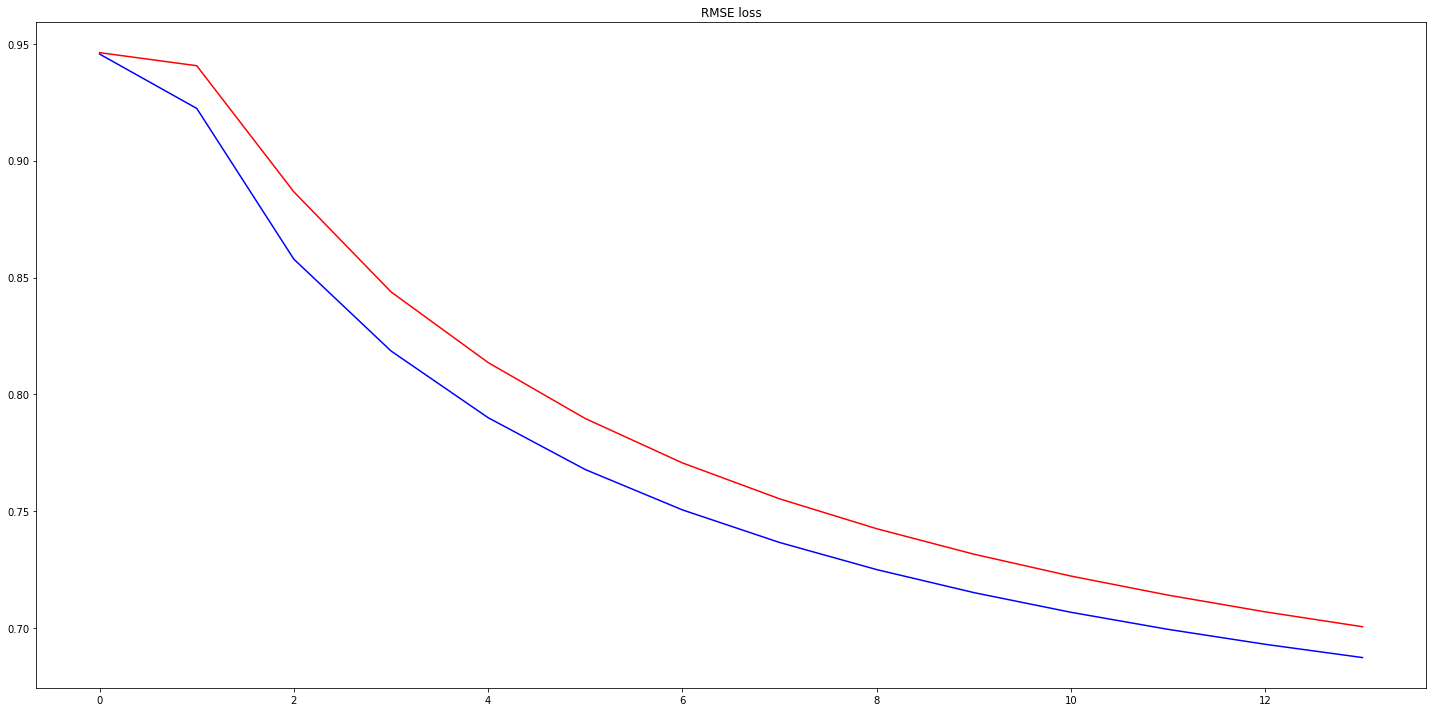

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.0560846  0.07007931 0.04392381 ... 0.53289688 1.29435897 0.03745508]
 [0.37304875 0.27168646 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

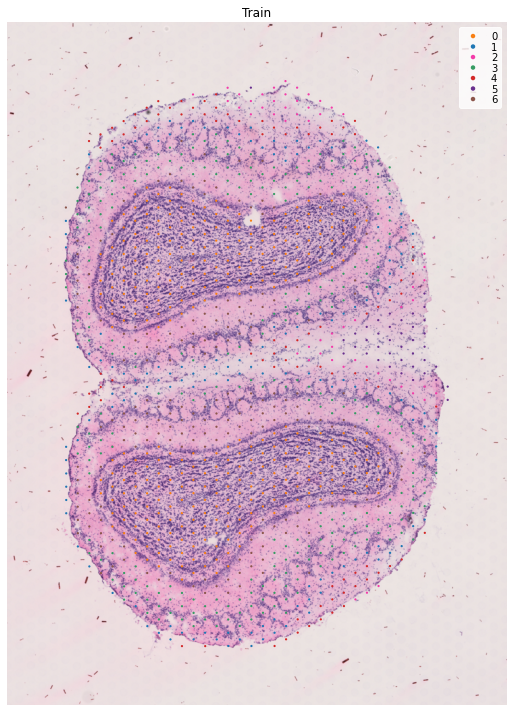

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + remove only highest distanced pixel

In [5]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means_remove_highest_distance')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [6]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [7]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [8]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [9]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:59<00:00, 238.86it/s]


Epoch #0 Train Loss: 0.8911209696473229
Epoch #0 Test Loss: 0.8908440563309924


Train epoch 1/300: 100%|██████████| 71449/71449 [05:12<00:00, 228.32it/s]


Epoch #1 Train Loss: 0.8816222717003894
Epoch #1 Test Loss: 0.8517881175292832


Train epoch 2/300: 100%|██████████| 71449/71449 [05:24<00:00, 220.17it/s]


Epoch #2 Train Loss: 0.7842511954253353
Epoch #2 Test Loss: 0.7340287298122647


Train epoch 3/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.57it/s]


Epoch #3 Train Loss: 0.708478421185472
Epoch #3 Test Loss: 0.666665389087149


Train epoch 4/300: 100%|██████████| 71449/71449 [05:39<00:00, 210.64it/s]


Epoch #4 Train Loss: 0.657820785806591
Epoch #4 Test Loss: 0.6208609039709589


Train epoch 5/300: 100%|██████████| 71449/71449 [05:52<00:00, 202.79it/s]


Epoch #5 Train Loss: 0.6192636408151471
Epoch #5 Test Loss: 0.585483664987217


Train epoch 6/300: 100%|██████████| 71449/71449 [06:04<00:00, 196.03it/s]


Epoch #6 Train Loss: 0.588832397227519
Epoch #6 Test Loss: 0.5583624008789787


Train epoch 7/300: 100%|██████████| 71449/71449 [06:08<00:00, 194.02it/s]


Epoch #7 Train Loss: 0.564660978174529
Epoch #7 Test Loss: 0.5368510165268258


Train epoch 8/300: 100%|██████████| 71449/71449 [06:14<00:00, 190.73it/s]


Epoch #8 Train Loss: 0.5448538102699636
Epoch #8 Test Loss: 0.5192145543356406


Train epoch 9/300: 100%|██████████| 71449/71449 [06:18<00:00, 188.94it/s]


Epoch #9 Train Loss: 0.5282533397209803
Epoch #9 Test Loss: 0.5044855567499525


Train epoch 10/300: 100%|██████████| 71449/71449 [06:29<00:00, 183.55it/s]


Epoch #10 Train Loss: 0.514160710192618
Epoch #10 Test Loss: 0.4920287413450516


Train epoch 11/300: 100%|██████████| 71449/71449 [06:39<00:00, 178.82it/s]


Epoch #11 Train Loss: 0.502056759360075
Epoch #11 Test Loss: 0.4813504697368582


Train epoch 12/300: 100%|██████████| 71449/71449 [06:48<00:00, 174.84it/s]


Epoch #12 Train Loss: 0.49153603000019547
Epoch #12 Test Loss: 0.47208241300731413


Train epoch 13/300: 100%|██████████| 71449/71449 [07:06<00:00, 167.56it/s]


Epoch #13 Train Loss: 0.48229010072627354
Epoch #13 Test Loss: 0.4639465343379703
Early stopping


### Plot train and test vs epochs

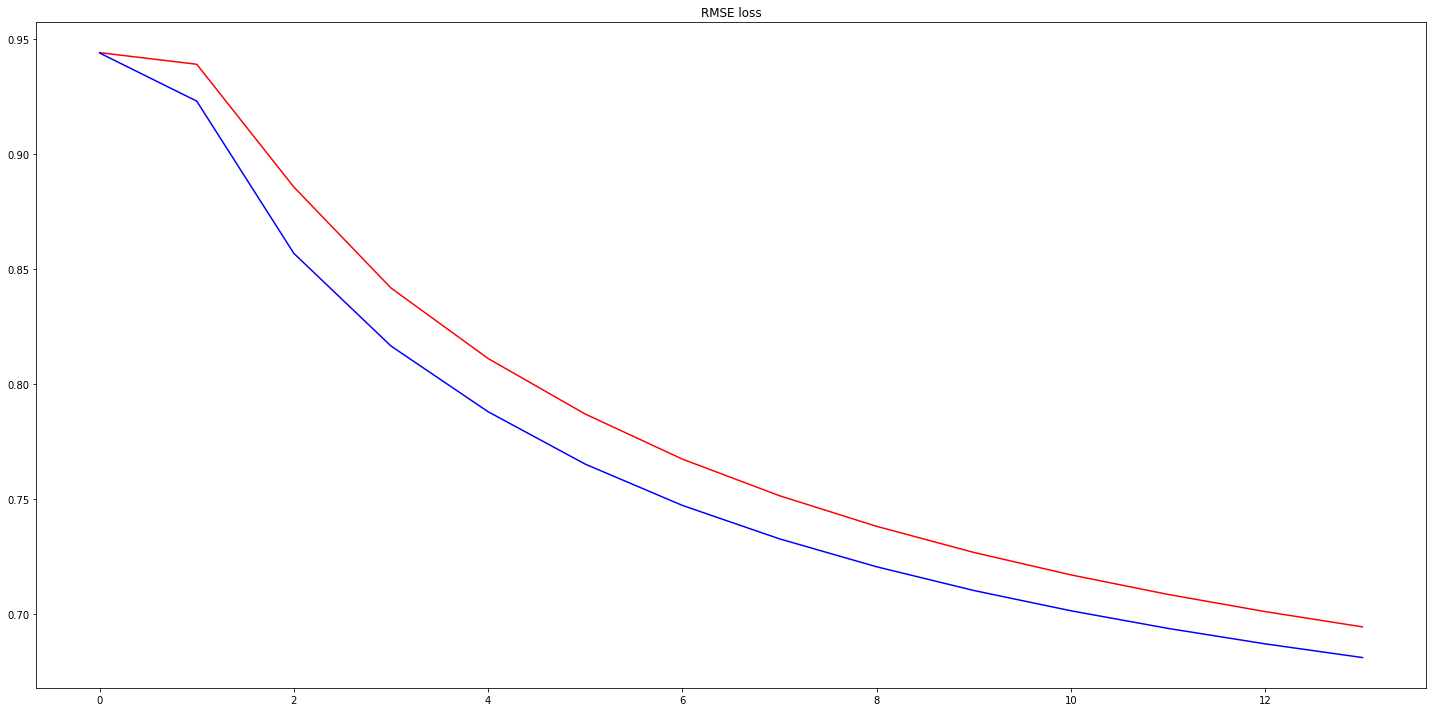

In [10]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [11]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.04513059 0.05388042 0.00573607 ... 0.5169363  1.22887957 0.01281964]
 [0.42189014 0.26540607 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

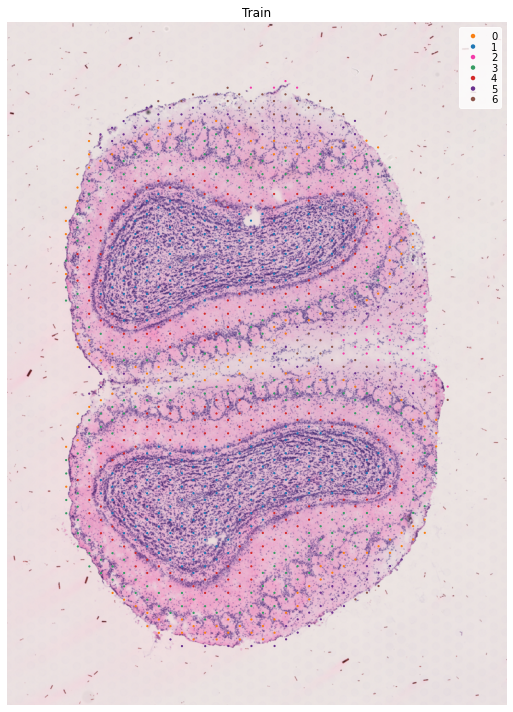

In [12]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only pixels differs up to 25 + tile of size 20

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_mean')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_valid,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:59<00:00, 238.86it/s]


Epoch #0 Train Loss: 0.8911209696473229
Epoch #0 Test Loss: 0.8908440563309924


Train epoch 1/300: 100%|██████████| 71449/71449 [05:12<00:00, 228.32it/s]


Epoch #1 Train Loss: 0.8816222717003894
Epoch #1 Test Loss: 0.8517881175292832


Train epoch 2/300: 100%|██████████| 71449/71449 [05:24<00:00, 220.17it/s]


Epoch #2 Train Loss: 0.7842511954253353
Epoch #2 Test Loss: 0.7340287298122647


Train epoch 3/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.57it/s]


Epoch #3 Train Loss: 0.708478421185472
Epoch #3 Test Loss: 0.666665389087149


Train epoch 4/300: 100%|██████████| 71449/71449 [05:39<00:00, 210.64it/s]


Epoch #4 Train Loss: 0.657820785806591
Epoch #4 Test Loss: 0.6208609039709589


Train epoch 5/300: 100%|██████████| 71449/71449 [05:52<00:00, 202.79it/s]


Epoch #5 Train Loss: 0.6192636408151471
Epoch #5 Test Loss: 0.585483664987217


Train epoch 6/300: 100%|██████████| 71449/71449 [06:04<00:00, 196.03it/s]


Epoch #6 Train Loss: 0.588832397227519
Epoch #6 Test Loss: 0.5583624008789787


Train epoch 7/300: 100%|██████████| 71449/71449 [06:08<00:00, 194.02it/s]


Epoch #7 Train Loss: 0.564660978174529
Epoch #7 Test Loss: 0.5368510165268258


Train epoch 8/300: 100%|██████████| 71449/71449 [06:14<00:00, 190.73it/s]


Epoch #8 Train Loss: 0.5448538102699636
Epoch #8 Test Loss: 0.5192145543356406


Train epoch 9/300: 100%|██████████| 71449/71449 [06:18<00:00, 188.94it/s]


Epoch #9 Train Loss: 0.5282533397209803
Epoch #9 Test Loss: 0.5044855567499525


Train epoch 10/300: 100%|██████████| 71449/71449 [06:29<00:00, 183.55it/s]


Epoch #10 Train Loss: 0.514160710192618
Epoch #10 Test Loss: 0.4920287413450516


Train epoch 11/300: 100%|██████████| 71449/71449 [06:39<00:00, 178.82it/s]


Epoch #11 Train Loss: 0.502056759360075
Epoch #11 Test Loss: 0.4813504697368582


Train epoch 12/300: 100%|██████████| 71449/71449 [06:48<00:00, 174.84it/s]


Epoch #12 Train Loss: 0.49153603000019547
Epoch #12 Test Loss: 0.47208241300731413


Train epoch 13/300: 100%|██████████| 71449/71449 [07:06<00:00, 167.56it/s]


Epoch #13 Train Loss: 0.48229010072627354
Epoch #13 Test Loss: 0.4639465343379703
Early stopping


### Plot train and test vs epochs

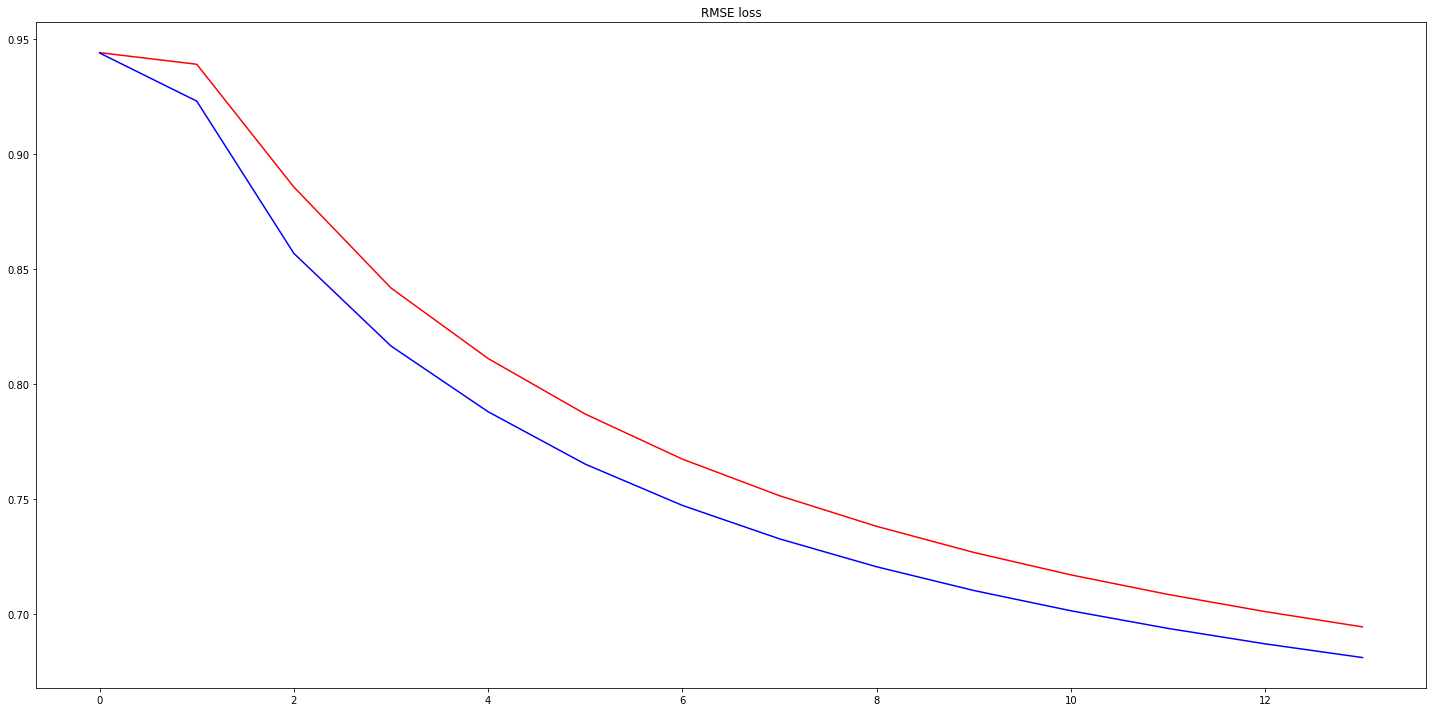

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.04513059 0.05388042 0.00573607 ... 0.5169363  1.22887957 0.01281964]
 [0.42189014 0.26540607 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

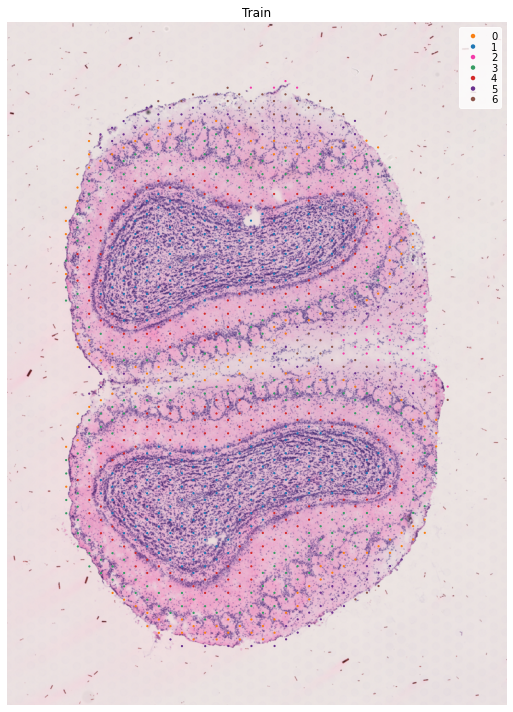

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## Train edge detection classifier

In [ ]:
from load_data import load_edge_detection_data
load_edge_detection_data(dataset_name)

(<torch.utils.data.dataloader.DataLoader at 0x7f35810fff70>,
 <torch.utils.data.dataloader.DataLoader at 0x7f35810ff700>)

# NN- MF

In [ ]:
%load_ext autoreload
%autoreload 2
from models import NNMF
from torch import nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Linear Layer

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "RMSprop",
    'latent_dim': 20,
    'batch_size': BATCH_SIZE,
    'layers_sizes': [(20,10)]
}

In [ ]:
nnmf_model = NNMF(number_of_genes, number_of_spots, params, DEVICE)

In [ ]:
train_nnmf = engine(model = nnmf_model,
                    model_name = 'NNMF',
                    params = params,
                    epochs = 10,
                    dl_train = dataset.dl_train_top_genes,
                    dl_test = dataset.dl_test_top_genes,
                    device = DEVICE)

NNMF(
  (embedding_genes): Embedding(32286, 20)
  (embedding_spots): Embedding(1186, 20)
  (linear_layers): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [ ]:
nnmf_train_losses, nnmf_test_losses = train_nnmf.execute()

Train epoch 0/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.39it/s]


Epoch #0 Train Loss: 1.715077950765421
Epoch #0 Test Loss: 1.1432739220273862


Train epoch 1/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.48it/s]


Epoch #1 Train Loss: 1.4558057859680813
Epoch #1 Test Loss: 1.1426385038114741


Train epoch 2/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 58.66it/s]


Epoch #2 Train Loss: 1.3583749468207718
Epoch #2 Test Loss: 1.1421958867106463


Train epoch 3/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.22it/s]


Epoch #3 Train Loss: 1.3069062600394739
Epoch #3 Test Loss: 1.1418163653589695


Train epoch 4/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.97it/s]


Epoch #4 Train Loss: 1.2750337305282085
Epoch #4 Test Loss: 1.1420464775417325


Train epoch 5/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.69it/s]


Epoch #5 Train Loss: 1.2533327516711268
Epoch #5 Test Loss: 1.1421073479159147


Train epoch 6/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.12it/s]


Epoch #6 Train Loss: 1.2375957593478204
Epoch #6 Test Loss: 1.1420722943277333


Train epoch 7/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.55it/s]


Epoch #7 Train Loss: 1.2256633870287823
Epoch #7 Test Loss: 1.1419659700887672


Train epoch 8/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.43it/s]


Epoch #8 Train Loss: 1.2162969217632982
Epoch #8 Test Loss: 1.1419787936257435


Train epoch 9/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.14it/s]


Epoch #9 Train Loss: 1.2087504861272487
Epoch #9 Test Loss: 1.1419060227512068


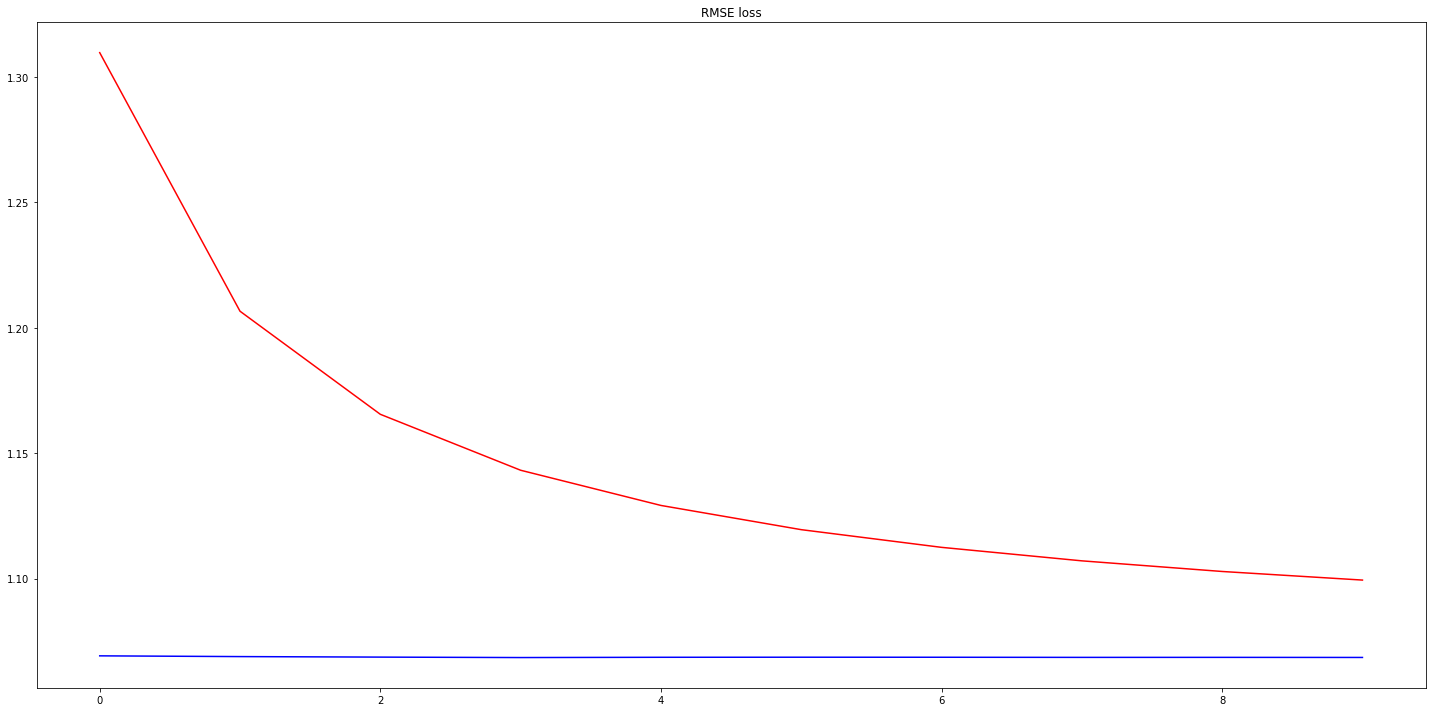

In [ ]:
plot_train_vs_test(nnmf_train_losses, nnmf_test_losses, "RMSE loss")

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nnmf_model, dataset, data, DEVICE)

  (0, 18)	5.0
  (0, 26)	2.0
  (0, 73)	2.0
  (0, 78)	3.0
  (0, 55)	2.0
  (0, 72)	1.0
  (0, 80)	3.0
  (0, 40)	2.0
  (0, 62)	1.0
  (0, 84)	1.0
  (0, 0)	1.0
  (0, 47)	1.0
  (0, 35)	2.0
  (0, 54)	2.0
  (0, 25)	3.0
  (0, 31)	2.0
  (0, 81)	2.0
  (0, 52)	1.0
  (0, 3)	2.0
  (0, 71)	1.0
  (0, 70)	2.0
  (0, 65)	1.0
  (0, 24)	1.0
  (0, 27)	7.0
  (0, 51)	2.0
  :	:
  (1184, 56)	23.0
  (1184, 49)	9.0
  (1184, 36)	15.0
  (1184, 7)	24.0
  (1184, 64)	18.0
  (1184, 9)	17.0
  (1184, 68)	20.0
  (1184, 44)	13.0
  (1184, 5)	13.0
  (1184, 10)	25.0
  (1184, 22)	24.0
  (1184, 16)	32.0
  (1184, 23)	34.0
  (1184, 37)	19.0
  (1184, 85)	24.0
  (1184, 95)	196.0
  (1184, 96)	125.0
  (1184, 91)	891.0
  (1184, 92)	499.0
  (1184, 90)	524.0
  (1184, 93)	682.0
  (1184, 97)	42.0
  (1184, 98)	260.0
  (1184, 99)	36.0
  (1184, 94)	295.0 [[list([3.1679160594940186]) list([3.1769323348999023])
  list([3.1682467460632324]) ... list([3.1713924407958984])
  list([3.18613600730896]) list([3.172372341156006])]
 [list([3.199940681457

ValueError: setting an array element with a sequence.

In [ ]:
plot_true_vs_reconstructed_histogram(df_expressions_true, df_expressions_preds)

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## 3 Linear Layers

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "Adam",
    'latent_dim': 20,
    'batch_size': BATCH_SIZE,
    'layers_sizes': [(40,100), (100,50), (50,10)]
}

In [ ]:
nnmf_model = NNMF(number_of_genes, number_of_spots, params, DEVICE)

In [ ]:
train_nnmf = engine(model = nnmf_model,
                    model_name = 'NNMF',
                    params = params,
                    epochs = 10,
                    dl_train = dataset.dl_train_top_genes,
                    dl_test = dataset.dl_test_top_genes,
                    device = DEVICE)

In [ ]:
nnmf_train_losses, nnmf_test_losses = train_nnmf.execute()

In [ ]:
plot_train_vs_test(nnmf_train_losses, nnmf_test_losses, "RMSE loss")

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nnmf_model, dataset, data, DEVICE)

In [ ]:
plot_true_vs_reconstructed_histogram(df_expressions_true, df_expressions_preds)

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

# NeuMF

In [ ]:
%load_ext autoreload
%autoreload 2
from models import NeuMF

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "SGD",
    'latent_dim': 20,
    'batch_size': BATCH_SIZE,
    'layers_sizes': [40, 10]
}

In [ ]:
neumf_model = NeuMF(number_of_genes, number_of_spots, params, DEVICE)

In [ ]:
train_neumf = engine(model = neumf_model,
                    model_name = 'NeuMF',
                    params = params,
                    epochs = 5,
                    dl_train = dataset.dl_train_top_genes,
                    dl_test = dataset.dl_test_top_genes,
                    device = DEVICE)

In [ ]:
neumf_train_losses, neumf_test_losses = train_neumf.execute()

In [ ]:
plot_train_vs_test(neumf_train_losses, neumf_test_losses, "RMSE loss")

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(neumf_model, dataset, data, DEVICE)

In [ ]:
plot_true_vs_reconstructed_histogram(df_expressions_true, df_expressions_preds)

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)